In [18]:
# Accurate Result with own Method

import os
import cv2
import numpy as np

input_folder = r"C:\Users\LAB-502-09\Desktop\Bacterial Spot"
output_folder = r"C:\Users\LAB-502-09\Desktop\Augmented"

desired_num_images = 6000

os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "images"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "labels"), exist_ok=True)

image_files = os.listdir(os.path.join(input_folder, "images"))

num_augmentations = int(desired_num_images / len(image_files))

for image_file in image_files:
    image_path = os.path.join(input_folder, "images", image_file)
    label_path = os.path.join(input_folder, "labels", f"{os.path.splitext(image_file)[0]}.txt")

    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    augmented_data = []

    for line in lines:
        values = line.strip().split(' ')
        class_index = int(values[0])
        coordinates = [float(val) for val in values[1:]]

        coordinates = np.array(coordinates).reshape(-1, 2)
        coordinates[:, 0] *= image_width
        coordinates[:, 1] *= image_height

        augmented_data.append((class_index, coordinates))

    for i in range(num_augmentations):
        # Rotate image
        angle = np.random.uniform(-45, 45)
        rotation_matrix = cv2.getRotationMatrix2D((image_width/2, image_height/2), angle, 1)
        augmented_image = cv2.warpAffine(image, rotation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

        # Rotate keypoints
        augmented_labels = []
        for class_index, keypoints in augmented_data:
            rotated_keypoints = []
            for coord in keypoints:
                x = coord[0]
                y = coord[1]
                point = np.array([[x], [y], [1]])
                transformed_point = np.dot(rotation_matrix, point)
                x_final = transformed_point[0, 0]
                y_final = transformed_point[1, 0]
                rotated_keypoints.append((x_final, y_final))
            augmented_labels.append((class_index, np.array(rotated_keypoints)))

        # Save augmented image and labels
        augmented_image_path = os.path.join(output_folder, "images", f"{image_file}_{i}.jpg")
        cv2.imwrite(augmented_image_path, augmented_image)

        augmented_label_path = os.path.join(output_folder, "labels", f"{image_file}_{i}.txt")
        with open(augmented_label_path, 'w') as f:
            for class_index, keypoints in augmented_labels:
                f.write(f"{class_index}")
                for kp in keypoints:
                    x = kp[0] / image_width
                    y = kp[1] / image_height
                    f.write(f" {x} {y}")
                f.write("\n")


In [28]:
# Accurate Result for rotation and flipping


import os
import cv2
import numpy as np

input_folder = r"D:\Sintu\Plant Village Tomato\Target Spot"
output_folder = r"D:\Sintu\Plant Village Tomato\Target Spot Augmented"

desired_num_images = 6000

os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "images"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "labels"), exist_ok=True)

image_files = os.listdir(os.path.join(input_folder, "images"))

num_augmentations = int(desired_num_images / len(image_files))

for image_file in image_files:
    image_path = os.path.join(input_folder, "images", image_file)
    label_path = os.path.join(input_folder, "labels", f"{os.path.splitext(image_file)[0]}.txt")

    image = cv2.imread(image_path)
    image_height, image_width, _ = image.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    augmented_data = []

    for line in lines:
        values = line.strip().split(' ')
        class_index = int(values[0])
        coordinates = [float(val) for val in values[1:]]

        coordinates = np.array(coordinates).reshape(-1, 2)
        coordinates[:, 0] *= image_width
        coordinates[:, 1] *= image_height

        augmented_data.append((class_index, coordinates))

    for i in range(num_augmentations):
        
        # Flip image horizontally
        augmented_image_horizontal = cv2.flip(image, 1)
        # Flip image vertically
        augmented_image_vertical = cv2.flip(image, 0)

        # Flip keypoints accordingly for horizontal augmentation
        augmented_labels_horizontal = []
        for class_index, keypoints in augmented_data:
            flipped_keypoints_horizontal = []
            for coord in keypoints:
                x = coord[0]
                y = coord[1]
                x_final = image_width - x
                flipped_keypoints_horizontal.append((x_final, y))
            augmented_labels_horizontal.append((class_index, np.array(flipped_keypoints_horizontal)))

        # Flip keypoints accordingly for vertical augmentation
        augmented_labels_vertical = []
        for class_index, keypoints in augmented_data:
            flipped_keypoints_vertical = []
            for coord in keypoints:
                x = coord[0]
                y = coord[1]
                y_final = image_height - y
                flipped_keypoints_vertical.append((x, y_final))
            augmented_labels_vertical.append((class_index, np.array(flipped_keypoints_vertical)))

        # Rotate image
        angle = np.random.uniform(-45, 45)
        rotation_matrix = cv2.getRotationMatrix2D((image_width / 2, image_height / 2), angle, 1)
        augmented_image_rotated = cv2.warpAffine(image, rotation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

        # Rotate keypoints
        augmented_labels_rotated = []
        for class_index, keypoints in augmented_data:
            rotated_keypoints = []
            for coord in keypoints:
                x = coord[0]
                y = coord[1]
                point = np.array([[x], [y], [1]])
                transformed_point = np.dot(rotation_matrix, point)
                x_final = transformed_point[0, 0]
                y_final = transformed_point[1, 0]
                rotated_keypoints.append((x_final, y_final))
            augmented_labels_rotated.append((class_index, np.array(rotated_keypoints)))

        # Save augmented images and labels
        augmented_image_path_horizontal = os.path.join(output_folder, "images", f"{image_file}_{i}_horizontal.jpg")
        augmented_image_path_vertical = os.path.join(output_folder, "images", f"{image_file}_{i}_vertical.jpg")
        augmented_image_path_rotated = os.path.join(output_folder, "images", f"{image_file}_{i}_rotated.jpg")

        cv2.imwrite(augmented_image_path_horizontal, augmented_image_horizontal)
        cv2.imwrite(augmented_image_path_vertical, augmented_image_vertical)
        cv2.imwrite(augmented_image_path_rotated, augmented_image_rotated)

        augmented_label_path_horizontal = os.path.join(output_folder, "labels", f"{image_file}_{i}_horizontal.txt")
        augmented_label_path_vertical = os.path.join(output_folder, "labels", f"{image_file}_{i}_vertical.txt")
        augmented_label_path_rotated = os.path.join(output_folder, "labels", f"{image_file}_{i}_rotated.txt")

        with open(augmented_label_path_horizontal, 'w') as f_horizontal:
            for class_index, keypoints in augmented_labels_horizontal:
                f_horizontal.write(f"{class_index}")
                for kp in keypoints:
                    x = kp[0] / image_width
                    y = kp[1] / image_height
                    f_horizontal.write(f" {x} {y}")
                f_horizontal.write("\n")

        with open(augmented_label_path_vertical, 'w') as f_vertical:
            for class_index, keypoints in augmented_labels_vertical:
                f_vertical.write(f"{class_index}")
                for kp in keypoints:
                    x = kp[0] / image_width
                    y = kp[1] / image_height
                    f_vertical.write(f" {x} {y}")
                f_vertical.write("\n")

        with open(augmented_label_path_rotated, 'w') as f_rotated:
            for class_index, keypoints in augmented_labels_rotated:
                f_rotated.write(f"{class_index}")
                for kp in keypoints:
                    x = kp[0] / image_width
                    y = kp[1] / image_height
                    f_rotated.write(f" {x} {y}")
                f_rotated.write("\n")

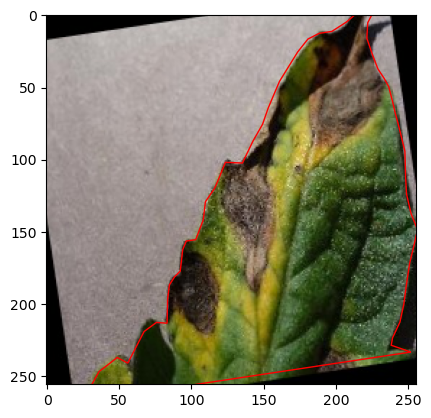

In [10]:
# Plotting image with labels


import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_image_with_label(image_path, label_path):

    image = plt.imread(image_path)

    fig, ax = plt.subplots()

    ax.imshow(image)

    with open(label_path, 'r') as f:
        label_data = f.readline().strip().split()

    label_id = int(label_data[0])
    label_values = list(map(float, label_data[1:]))

    image_height, image_width, _ = image.shape

    num_points = len(label_values) // 2
    x_coords = label_values[::2]
    y_coords = label_values[1::2]

    x_coords = [x * image_width for x in x_coords]
    y_coords = [y * image_height for y in y_coords]

    polygon = patches.Polygon(np.column_stack((x_coords, y_coords)), linewidth=1, edgecolor='r', facecolor='none')

    ax.add_patch(polygon)

    ax.set_aspect('equal')

    plt.show()

image_file = r"C:\Users\LAB-502-09\Desktop\Augmented\images\4e432e1a-image_60.JPG_0.jpg"
label_file = r"C:\Users\LAB-502-09\Desktop\Augmented\labels\4e432e1a-image_60.JPG_0.txt"
plot_image_with_label(image_file, label_file)


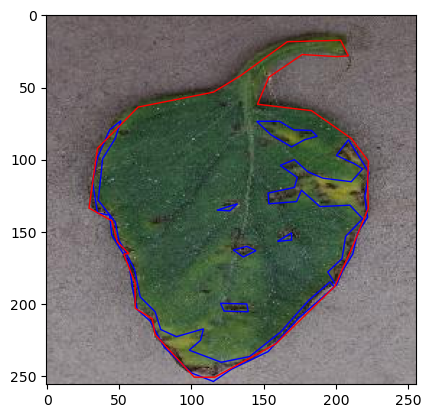

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def plot_image_with_label(image_path, label_path):
    image = plt.imread(image_path)
    fig, ax = plt.subplots()
    ax.imshow(image)

    with open(label_path, 'r') as f:
        label_data = f.readlines()

    for label_line in label_data:
        label_values = list(map(float, label_line.strip().split()))
        label_id = int(label_values[0])
        label_values = label_values[1:]

        image_height, image_width, _ = image.shape
        num_points = len(label_values) // 2
        x_coords = label_values[::2]
        y_coords = label_values[1::2]

        x_coords = [x * image_width for x in x_coords]
        y_coords = [y * image_height for y in y_coords]

        if label_id == 0:
            polygon_color = 'red'
        elif label_id == 1:
            polygon_color = 'blue'
        else:
            polygon_color = 'green'

        polygon = patches.Polygon(np.column_stack((x_coords, y_coords)), linewidth=1, edgecolor=polygon_color, facecolor='none')
        ax.add_patch(polygon)

    ax.set_aspect('equal')
    plt.show()

image_file = r"C:\Users\LAB-502-09\Desktop\Augmented\images\3d05cef9-image_9.JPG_34_vertical.jpg"
label_file = r"C:\Users\LAB-502-09\Desktop\Augmented\labels\3d05cef9-image_9.JPG_34_vertical.txt"
plot_image_with_label(image_file, label_file)

In [2]:
import os
import cv2
import numpy as np

input_folder = r"D:\Sintu\Plant Village Tomato\Healthy"
output_folder = r"D:\Sintu\Plant Village Tomato\Healthy Augmented"

desired_num_images = 6000

os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "images"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "labels"), exist_ok=True)

image_files = os.listdir(os.path.join(input_folder, "images"))

num_augmentations = int(desired_num_images / len(image_files))

for image_file in image_files:
    image_path = os.path.join(input_folder, "images", image_file)
    label_path = os.path.join(input_folder, "labels", f"{os.path.splitext(image_file)[0]}.txt")

    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
    image_height, image_width, _ = image.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    augmented_data = []

    for line in lines:
        values = line.strip().split(' ')
        class_index = int(values[0])
        coordinates = [float(val) for val in values[1:]]

        coordinates = np.array(coordinates).reshape(-1, 2)
        coordinates[:, 0] *= image_width
        coordinates[:, 1] *= image_height

        augmented_data.append((class_index, coordinates))

    for i in range(num_augmentations):
        # Select a random augmentation method
        augmentation_method = np.random.choice(["rotate",  "flip",  "brightness"])

        if augmentation_method == "rotate":
            # Rotate image
            angle = np.random.uniform(-10, 10)
            rotation_matrix = cv2.getRotationMatrix2D((image_width / 2.0, image_height / 2.0), angle, 1).astype(np.float32)
            augmented_image = cv2.warpAffine(image, rotation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

            # Rotate keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                rotated_keypoints = []
                for coord in keypoints:
                    x = coord[0]
                    y = coord[1]
                    point = np.array([[x], [y], [1]], dtype=np.float32)
                    transformed_point = np.dot(rotation_matrix, point)
                    x_final = transformed_point[0, 0]
                    y_final = transformed_point[1, 0]
                    rotated_keypoints.append((x_final, y_final))
                augmented_labels.append((class_index, np.array(rotated_keypoints)))

        
        elif augmentation_method == "flip":
            # Flip image horizontally
            augmented_image = cv2.flip(image, 1)

            # Flip keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                flipped_keypoints = []
                for coord in keypoints:
                    x = image_width - coord[0]
                    y = coord[1]
                    flipped_keypoints.append((x, y))
                augmented_labels.append((class_index, np.array(flipped_keypoints)))

        
        elif augmentation_method == "brightness":
            # Adjust brightness
            brightness_factor = np.random.uniform(0.7, 1.3)
            augmented_image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)

            augmented_labels = augmented_data

        else:
            # No augmentation, use original image and labels
            augmented_image = image
            augmented_labels = augmented_data

        # Save augmented image and labels
        augmented_image_path = os.path.join(output_folder, "images", f"{image_file}_{i}.jpg")
        cv2.imwrite(augmented_image_path, augmented_image)

        augmented_label_path = os.path.join(output_folder, "labels", f"{image_file}_{i}.txt")
        with open(augmented_label_path, 'w') as f:
            for class_index, keypoints in augmented_labels:
                f.write(f"{class_index}")
                for kp in keypoints:
                    x = kp[0] / image_width
                    y = kp[1] / image_height
                    f.write(f" {x} {y}")
                f.write("\n")

In [ ]:
import os
import cv2
import numpy as np

input_folder = r"C:\Users\Victor\Downloads\Bacterial Spot Project\Plant Village Annotated\Healthy"
output_folder = r"C:\Users\Victor\Downloads\Bacterial Spot Project\Plant Village Annotated\Healthy_Augmented"

desired_num_images = 6000

os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "images"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "labels"), exist_ok=True)

image_files = os.listdir(os.path.join(input_folder, "images"))

num_augmentations = int(desired_num_images / len(image_files))

for image_file in image_files:
    image_path = os.path.join(input_folder, "images", image_file)
    label_path = os.path.join(input_folder, "labels", f"{os.path.splitext(image_file)[0]}.txt")

    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
    image_height, image_width, _ = image.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    augmented_data = []

    for line in lines:
        values = line.strip().split(' ')
        class_index = int(values[0])
        coordinates = [float(val) for val in values[1:]]

        coordinates = np.array(coordinates).reshape(-1, 2)
        coordinates[:, 0] *= image_width
        coordinates[:, 1] *= image_height

        augmented_data.append((class_index, coordinates))

    for i in range(num_augmentations):
        # Select a random augmentation method
        augmentation_method = np.random.choice(["rotate", "translate", "flip", "zoom", "brightness"])

        if augmentation_method == "rotate":
            # Rotate image
            angle = np.random.uniform(-10, 10)
            rotation_matrix = cv2.getRotationMatrix2D((image_width / 2.0, image_height / 2.0), angle, 1).astype(np.float32)
            augmented_image = cv2.warpAffine(image, rotation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

            # Rotate keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                rotated_keypoints = []
                for coord in keypoints:
                    x = coord[0]
                    y = coord[1]
                    point = np.array([[x], [y], [1]], dtype=np.float32)
                    transformed_point = np.dot(rotation_matrix, point)
                    x_final = transformed_point[0, 0]
                    y_final = transformed_point[1, 0]
                    rotated_keypoints.append((x_final, y_final))
                augmented_labels.append((class_index, np.array(rotated_keypoints)))

        elif augmentation_method == "translate":
            # Translate image
            tx = np.random.uniform(-20, 20)
            ty = np.random.uniform(-20, 20)
            translation_matrix = np.float32([[1.0, 0.0, tx], [0.0, 1.0, ty]])
            augmented_image = cv2.warpAffine(image, translation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

            # Translate keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                translated_keypoints = []
                for coord in keypoints:
                    x = coord[0] + tx
                    y = coord[1] + ty
                    translated_keypoints.append((x, y))
                augmented_labels.append((class_index, np.array(translated_keypoints)))

        elif augmentation_method == "flip":
            # Flip image horizontally
            augmented_image = cv2.flip(image, 1)

            # Flip keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                flipped_keypoints = []
                for coord in keypoints:
                    x = image_width - coord[0]
                    y = coord[1]
                    flipped_keypoints.append((x, y))
                augmented_labels.append((class_index, np.array(flipped_keypoints)))

        elif augmentation_method == "zoom":
            # Zoom image
            zoom_factor = np.random.uniform(0.8, 1.2)
            scaled_image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)
            h, w, _ = scaled_image.shape
            crop_x = max(int(w // 2 - image_width // 2), 0)
            crop_y = max(int(h // 2 - image_height // 2), 0)
            crop_width = min(crop_x + image_width, w) - crop_x
            crop_height = min(crop_y + image_height, h) - crop_y
            augmented_image = scaled_image[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]

            # Zoom keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                zoomed_keypoints = []
                for coord in keypoints:
                    x = (coord[0] - w // 2) / zoom_factor + image_width // 2
                    y = (coord[1] - h // 2) / zoom_factor + image_height // 2
                    zoomed_keypoints.append((x, y))
                augmented_labels.append((class_index, np.array(zoomed_keypoints)))

        elif augmentation_method == "brightness":
            # Adjust brightness
            brightness_factor = np.random.uniform(0.7, 1.3)
            augmented_image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)

            augmented_labels = augmented_data

        else:
            # No augmentation, use original image and labels
            augmented_image = image
            augmented_labels = augmented_data

        # Save augmented image and labels
        augmented_image_path = os.path.join(output_folder, "images", f"{image_file}_{i}.jpg")
        cv2.imwrite(augmented_image_path, augmented_image)

        augmented_label_path = os.path.join(output_folder, "labels", f"{image_file}_{i}.txt")
        with open(augmented_label_path, 'w') as f:
            for class_index, keypoints in augmented_labels:
                f.write(f"{class_index}")
                for kp in keypoints:
                    x = kp[0] / image_width
                    y = kp[1] / image_height
                    f.write(f" {x} {y}")
                f.write("\n")

In [ ]:
import os
import cv2
import numpy as np

input_folder = r"C:\Users\Victor\Downloads\Bacterial Spot Project\Plant Village Annotated\Healthy"
output_folder = r"C:\Users\Victor\Downloads\Bacterial Spot Project\Plant Village Annotated\Healthy_Augmented"

desired_num_images = 6000

os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "images"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "labels"), exist_ok=True)

image_files = os.listdir(os.path.join(input_folder, "images"))

num_augmentations = int(desired_num_images / len(image_files))

for image_file in image_files:
    image_path = os.path.join(input_folder, "images", image_file)
    label_path = os.path.join(input_folder, "labels", f"{os.path.splitext(image_file)[0]}.txt")

    image = cv2.imread(image_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
    image_height, image_width, _ = image.shape

    with open(label_path, 'r') as f:
        lines = f.readlines()

    augmented_data = []

    for line in lines:
        values = line.strip().split(' ')
        class_index = int(values[0])
        coordinates = [float(val) for val in values[1:]]

        coordinates = np.array(coordinates).reshape(-1, 2)
        coordinates[:, 0] *= image_width
        coordinates[:, 1] *= image_height

        augmented_data.append((class_index, coordinates))

    for i in range(num_augmentations):
        # Select a random augmentation method
        augmentation_method = np.random.choice(["rotate", "translate", "flip", "zoom", "brightness"])

        if augmentation_method == "rotate":
            # Rotate image
            angle = np.random.uniform(-10, 10)
            rotation_matrix = cv2.getRotationMatrix2D((image_width / 2.0, image_height / 2.0), angle, 1).astype(np.float32)
            augmented_image = cv2.warpAffine(image, rotation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

            # Rotate keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                rotated_keypoints = []
                for coord in keypoints:
                    x = coord[0]
                    y = coord[1]
                    point = np.array([[x], [y], [1]], dtype=np.float32)
                    transformed_point = np.dot(rotation_matrix, point)
                    x_final = transformed_point[0, 0]
                    y_final = transformed_point[1, 0]
                    rotated_keypoints.append((x_final, y_final))
                augmented_labels.append((class_index, np.array(rotated_keypoints)))

        elif augmentation_method == "translate":
            # Translate image
            tx = np.random.uniform(-20, 20)
            ty = np.random.uniform(-20, 20)
            translation_matrix = np.float32([[1.0, 0.0, tx], [0.0, 1.0, ty]])
            augmented_image = cv2.warpAffine(image, translation_matrix, (image_width, image_height), flags=cv2.INTER_LINEAR)

            # Translate keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                translated_keypoints = []
                for coord in keypoints:
                    x = coord[0] + tx
                    y = coord[1] + ty
                    translated_keypoints.append((x, y))
                augmented_labels.append((class_index, np.array(translated_keypoints)))

        elif augmentation_method == "flip":
            # Flip image horizontally
            augmented_image = cv2.flip(image, 1)

            # Flip keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                flipped_keypoints = []
                for coord in keypoints:
                    x = image_width - coord[0]
                    y = coord[1]
                    flipped_keypoints.append((x, y))
                augmented_labels.append((class_index, np.array(flipped_keypoints)))

        elif augmentation_method == "zoom":
            # Zoom image
            zoom_factor = np.random.uniform(0.8, 1.2)
            scaled_image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor, interpolation=cv2.INTER_LINEAR)
            h, w, _ = scaled_image.shape
            crop_x = max(int(w // 2 - image_width // 2), 0)
            crop_y = max(int(h // 2 - image_height // 2), 0)
            crop_width = min(crop_x + image_width, w) - crop_x
            crop_height = min(crop_y + image_height, h) - crop_y
            augmented_image = scaled_image[crop_y:crop_y + crop_height, crop_x:crop_x + crop_width]

            # Zoom keypoints
            augmented_labels = []
            for class_index, keypoints in augmented_data:
                zoomed_keypoints = []
                for coord in keypoints:
                    x = (coord[0] - w // 2) / zoom_factor + image_width // 2
                    y = (coord[1] - h // 2) / zoom_factor + image_height // 2
                    zoomed_keypoints.append((x, y))
                augmented_labels.append((class_index, np.array(zoomed_keypoints)))

        elif augmentation_method == "brightness":
            # Adjust brightness
            brightness_factor = np.random.uniform(0.7, 1.3)
            augmented_image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8)

            augmented_labels = augmented_data

        else:
            # No augmentation, use original image and labels
            augmented_image = image
            augmented_labels = augmented_data

        # Save augmented image and labels
        augmented_image_path = os.path.join(output_folder, "images", f"{image_file}_{i}.jpg")
        cv2.imwrite(augmented_image_path, augmented_image)

        augmented_label_path = os.path.join(output_folder, "labels", f"{image_file}_{i}.txt")
        with open(augmented_label_path, 'w') as f:
            for class_index, keypoints in augmented_labels:
                f.write(f"{class_index}")
                for kp in keypoints:
                    x = kp[0] / image_width
                    y = kp[1] / image_height
                    f.write(f" {x} {y}")
                f.write("\n")


In [ ]:
# Poor Accuracy from below both methods (using imgaug and Albumenatation library)


# Method 1
import os
import imgaug.augmenters as iaa
import numpy as np
from PIL import Image
from imgaug.augmentables import Keypoint, KeypointsOnImage

input_folder = r"C:\Users\Victor\Downloads\Bacterial Spot Project\Plant Village Annotated\Healthy"
output_folder = r"C:\Users\Victor\Downloads\Bacterial Spot Project\Plant Village Annotated\Healthy_Augmented"

desired_num_images = 6000

os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "images"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "labels"), exist_ok=True)

image_files = os.listdir(os.path.join(input_folder, "images"))

num_augmentations = int(desired_num_images / len(image_files))

augmentation_seq = iaa.Sequential([
    iaa.Fliplr(0.5),
    iaa.Affine(rotate=(-10, 10)),
])

for image_file in image_files:
    image_path = os.path.join(input_folder, "images", image_file)
    label_path = os.path.join(input_folder, "labels", f"{os.path.splitext(image_file)[0]}.txt")

    image = np.array(Image.open(image_path))

    with open(label_path, 'r') as f:
        lines = f.readlines()

    augmented_data = {}

    for line in lines:
        values = line.strip().split(' ')
        class_index = int(values[0])
        coordinates = [float(val) for val in values[1:]]

        coordinates = np.array(coordinates).reshape(-1, 2)

        image_height, image_width = image.shape[:2]
        coordinates[:, 0] *= image_width
        coordinates[:, 1] *= image_height

        keypoints = [Keypoint(x=coord[0], y=coord[1]) for coord in coordinates]

        keypoints_on_image = KeypointsOnImage(keypoints, shape=image.shape)

        if class_index not in augmented_data:
            augmented_data[class_index] = []
        augmented_data[class_index].append(keypoints_on_image)

    for i in range(num_augmentations):
        augmented_image = augmentation_seq.augment_image(image)

        augmented_labels = []
        for class_index, keypoints_on_images in augmented_data.items():
            augmented_keypoints_on_images = [augmentation_seq.augment_keypoints([kps])[0] for kps in keypoints_on_images]
            augmented_labels.append((class_index, augmented_keypoints_on_images))

        augmented_image_path = os.path.join(output_folder, "images", f"{image_file}_{i}.jpg")
        Image.fromarray(augmented_image).save(augmented_image_path)

        augmented_label_path = os.path.join(output_folder, "labels", f"{image_file}_{i}.txt")
        with open(augmented_label_path, 'w') as f:
            for class_index, augmented_keypoints_on_images in augmented_labels:
                f.write(f"{class_index}")
                for keypoints_on_image in augmented_keypoints_on_images:
                    for kp in keypoints_on_image.keypoints:
                        x = kp.x / image_width
                        y = kp.y / image_height
                        f.write(f" {x} {y}")
                f.write("\n")
                
                
                
# Method 2
import os
import imgaug.augmenters as iaa
import numpy as np
from PIL import Image
from imgaug.augmentables import Keypoint, KeypointsOnImage

input_folder = r"C:\Users\Victor\Downloads\Bacterial Spot Project\Plant Village Annotated\Healthy"
output_folder = r"C:\Users\Victor\Downloads\Bacterial Spot Project\Plant Village Annotated\Healthy_Augmented"

desired_num_images = 6000

os.makedirs(output_folder, exist_ok=True)
os.makedirs(os.path.join(output_folder, "images"), exist_ok=True)
os.makedirs(os.path.join(output_folder, "labels"), exist_ok=True)

image_files = os.listdir(os.path.join(input_folder, "images"))

num_augmentations = int(desired_num_images / len(image_files))

augmentation_seq = iaa.Sequential([
    iaa.Affine(rotate=(-10, 10)),
])

for image_file in image_files:
    image_path = os.path.join(input_folder, "images", image_file)
    label_path = os.path.join(input_folder, "labels", f"{os.path.splitext(image_file)[0]}.txt")

    image = np.array(Image.open(image_path))

    with open(label_path, 'r') as f:
        lines = f.readlines()

    augmented_data = {}

    for line in lines:
        values = line.strip().split(' ')
        class_index = int(values[0])
        coordinates = [float(val) for val in values[1:]]

        coordinates = np.array(coordinates).reshape(-1, 2)

        image_height, image_width = image.shape[:2]
        coordinates[:, 0] *= image_width
        coordinates[:, 1] *= image_height

        keypoints = [Keypoint(x=coord[0], y=coord[1]) for coord in coordinates]
        augmented_data[class_index] = keypoints

    for i in range(num_augmentations):
        augmented_image = augmentation_seq(image=image)

        augmented_labels = {}
        for class_index, keypoints in augmented_data.items():
            augmented_keypoints = augmentation_seq.augment_keypoints([KeypointsOnImage(keypoints, shape=image.shape)])[0]
            augmented_labels[class_index] = augmented_keypoints

        augmented_image_path = os.path.join(output_folder, "images", f"{image_file}_{i}.jpg")
        Image.fromarray(augmented_image).save(augmented_image_path)

        augmented_label_path = os.path.join(output_folder, "labels", f"{image_file}_{i}.txt")
        with open(augmented_label_path, 'w') as f:
            for class_index, keypoints_on_image in augmented_labels.items():
                f.write(f"{class_index}")
                for kp in keypoints_on_image.keypoints:
                    x = kp.x / augmented_image.shape[1]
                    y = kp.y / augmented_image.shape[0]
                    f.write(f" {x} {y}")
                f.write("\n")
